# Final Project Information Retrieval 

Kelompok 6: 

2301855154 - Axel Lie

2301937293 - Edbert Khovey

2301876650 - Kevin Jonathan

2301875761 - Paskah Riverdi Manurung

2301869840 - William Yulio

# Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import timeit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the dataset

In [ ]:
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=['label', 'message'])

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#  Exploratory Data Analysis

Pada bagian ini kami mengecek apakah ada null pada dataset kami dan juga kami mengecek countplot untuk dataset ini yaitu spam vs ham

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

label      0
message    0
dtype: int64

setelah dicek ternyata tidak ada null pada dataset ini

lalu kami melakukan mapping atau mengubah label ham menjadi 0 dan label spam menjadi 1

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Lalu kami membuat function untuk countplot kedua label pada dataset

In [ ]:
# Countplot for Spam vs. Ham as imbalanced dataset
def countplot():
  plt.figure(figsize=(8,8))
  g = sns.countplot(x='label', data=df)
  p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
  p = plt.xlabel('Is SMS Spam?')
  p = plt.ylabel('Count')

setelah dilihat ternyata datasetnya imbalance yang bedanya lumayan jauh

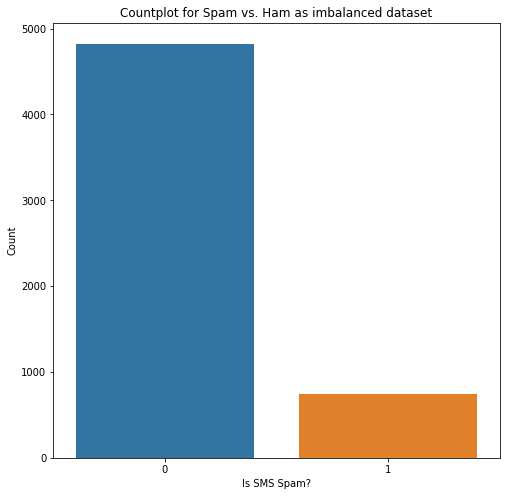

In [ ]:
countplot()

# Feature Engineering

Karena datasetnya imbalance maka kami melakukan oversampling

In [ ]:
spam = df[df['label']==1]
print('Number of Spam records: {}'.format(spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


pada bagian ini kami melakukan oversampling yaitu menambahkan dataset yang berlabel spam ke datasetnya agar datasetnya menjadi balance

In [ ]:
count = int((df.shape[0]-spam.shape[0])/spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, spam])
  
df.shape

(9307, 2)

setelah countplot hasilnya sudah hampir sama

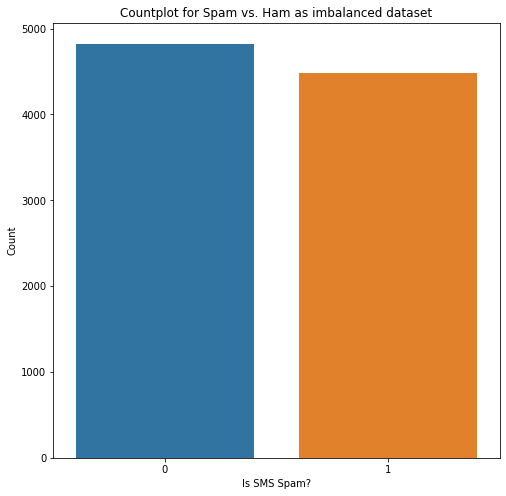

In [ ]:
countplot()

jika dilihat lewat angka juga hasilnya menjadi lebih balance

In [ ]:
spam = df[df['label']==1]
ham = df[df['label']==0]

print(f'Number of Spam records: {spam.shape[0]}')
print(f'Number of Ham records: {ham.shape[0]}')

Number of Spam records: 4482
Number of Ham records: 4825


Lalu kami juga menambahkan feature berapa banyak word atau word_count ke dalam datasetnya

In [ ]:
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [ ]:
df

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


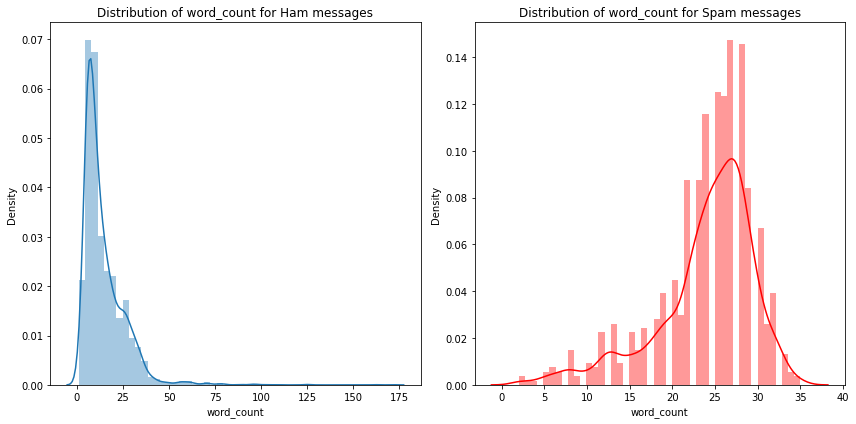

In [ ]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

Jika dilihat Spam messages word_count nya berada di kisaran 15-30 words, dan Ham messages berada pada kisaran di bawah 25 words.

Lalu kami juga membuat feature baru yaitu contains_currency_symbol jika pada message tersebut ada symbol ['€', '$', '¥', '£', '₹'] maka contains_currency_symbol nya 1 dan jika tidak ada maka contains_currency_symbol nya 0 

In [ ]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [ ]:
df.head()

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0


Lalu kami melakukan plotting untuk mengecek berapa banyak message yang contains_currency_symbol pada ham dan spam

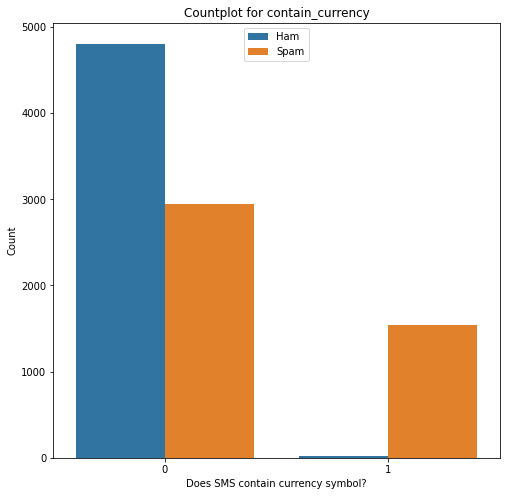

In [ ]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Jika dilihat hampir 1/3 dari spam message mengandung currency symbols atau contains_currency_symbol nya 1 dan hampir semua ham message tidak mengandung currency symbol

Lalu kami juga membuat feature baru yaitu contains_number jika suatu message mengandung angka maka feature contains_number nya 1 dan sebaliknya jika tidak mengandung angka maka 0

In [ ]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [ ]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


Lalu kami melakukan plotting untuk mengecek berapa banyak message yang contains_number pada ham dan spam

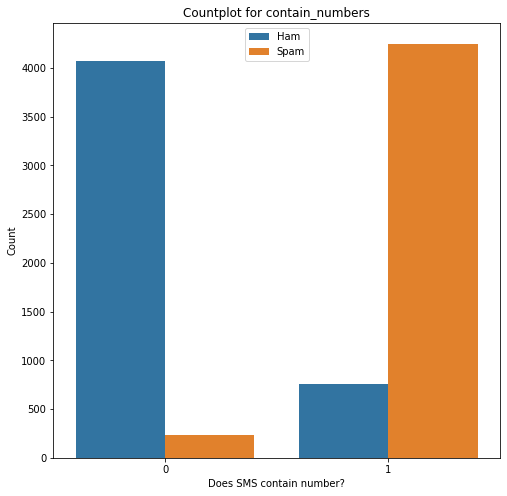

In [ ]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Dapat dilihat hampir semua message yang spam mengandung number dan semua message ham kebanyakan tidak mengandung number

# Data Cleaning

Pada bagian ini kami melakukan : Removing special character and numbers using regular expression, Converting the entire sms into lower case, Tokenizing the sms by words, Removing the stop words, Lemmatizing the words, Joining the lemmatized words, Building a corpus of message

In [ ]:
# Importing essential libraries for performing NLP

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [ ]:
# Creating the Bag of Words model

tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Model building 

Pada bagian ini kami mencoba membuat model dengan 3 metode yaitu MNB, Decision Tree, Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification report for Multinomial Naive Bayes model
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862

Time:  0.038800355000603304


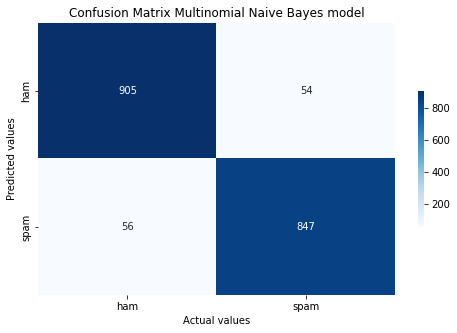

In [ ]:
start = timeit.default_timer()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
stop = timeit.default_timer()
print('Classification report for Multinomial Naive Bayes model')
print(classification_report(y_test, y_pred))
print('Time: ', stop - start)  

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix Multinomial Naive Bayes model')

Classification report for Decision Tree model
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

Time:  0.6127551419995143


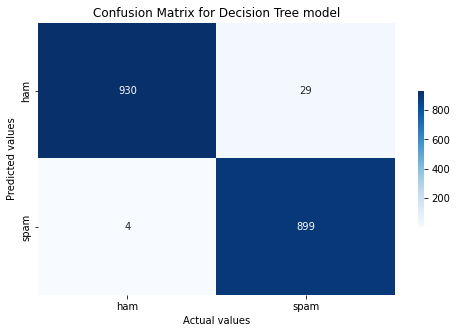

In [ ]:
start1 = timeit.default_timer()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
stop1 = timeit.default_timer()
print('Classification report for Decision Tree model')
print(classification_report(y_test, y_pred))
print('Time: ', stop1 - start1)  

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Decision Tree model')

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862

Time:  0.5179341470002328


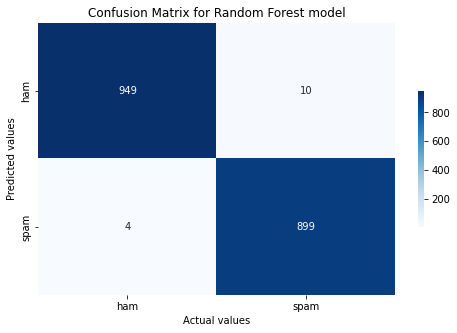

In [ ]:
start2 = timeit.default_timer()
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
stop2 = timeit.default_timer()
print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))
print('Time: ', stop2 - start2)  

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Random Forest model')

# Making predictions

pada bagian ini kami membuat function predict spam nya untuk menentukan dari suatu message itu spam atau ham

In [ ]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [ ]:
def spam_or_ham(sample_message):
  if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
  else:
    print('This is a HAM (normal) message.')

# Prediction 1 - SPAM

In [ ]:
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'
spam_or_ham(sample_message)

Gotcha! This is a SPAM message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Prediction 2 - HAM

In [ ]:
sample_message = 'Came to think of it. I have never got a spam message before.'
spam_or_ham(sample_message)

This is a HAM (normal) message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Prediction 3 - HAM

In [ ]:
sample_message = 'Ahhh. Work. I vaguely remember that! What does it feel like? Lol'
spam_or_ham(sample_message)

This is a HAM (normal) message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Prediction 4 - SPAM

In [ ]:
sample_message = 'Dear Walmart shopper, your purchase last month won a $1000 walmart gift card, go to www.vCardSpot.com within 24 hours to claim.'
spam_or_ham(sample_message)

Gotcha! This is a SPAM message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Prediction 5 - SPAM

In [ ]:
sample_message = 'URGENT! You have won a 1 week FREE membership in our 100,000 Prize Jackpot! Txt the word: CLAIM to receive the PRIZE'
spam_or_ham(sample_message)

Gotcha! This is a SPAM message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Prediction 6 - HAM

In [ ]:
sample_message = 'Nah I don\'t think he goes to usf, he lives around here though'
spam_or_ham(sample_message)

This is a HAM (normal) message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Prediction 7 - SPAM

In [ ]:
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'
spam_or_ham(sample_message)

Gotcha! This is a SPAM message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Prediction 8 - HAM

In [ ]:
sample_message = 'when can we catch up on the marketing of the pharmacy project? How would next week Tuesday work for you?'
spam_or_ham(sample_message)

This is a HAM (normal) message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
